In [2]:
import pandas as pd
from pathlib import Path
from datetime import datetime
import numpy as np



In [3]:
# retriving the path of csv file
csv_path = Path("../","Resources", "owid-covid-data.csv")

# initializing dataframe
initial_covid_df = pd.read_csv(csv_path)

initial_covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
# obtaining a list of columns 

initial_covid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
# creating a new dataframe that shows only necessary columns

reduced_covid_df = initial_covid_df[["location", "date", "total_cases_per_million", "new_cases_per_million", "total_deaths_per_million", 
                                     "new_deaths_per_million", "icu_patients_per_million", "hosp_patients_per_million", "positive_rate",
                                     "total_vaccinations_per_hundred", "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred",
                                     "new_vaccinations", "aged_65_older", "aged_70_older", "cardiovasc_death_rate",
                                     "diabetes_prevalence", "female_smokers", "male_smokers"]]

reduced_covid_df.head()

,location,date,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,icu_patients_per_million,hosp_patients_per_million,positive_rate,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
0,Afghanistan,2020-01-03,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581,1.337,597.029,9.59,NaN,NaN
1,Afghanistan,2020-01-04,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581,1.337,597.029,9.59,NaN,NaN
2,Afghanistan,2020-01-05,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581,1.337,597.029,9.59,NaN,NaN
3,Afghanistan,2020-01-06,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581,1.337,597.029,9.59,NaN,NaN
4,Afghanistan,2020-01-07,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581,1.337,597.029,9.59,NaN,NaN


In [6]:
# formatting datetime

reduced_covid_df_date = reduced_covid_df["date"].astype({"date": "datetime64[ns]"})

reduced_covid_df_date.info


<bound method Series.info of 0        2020-01-03
1        2020-01-04
2        2020-01-05
3        2020-01-06
4        2020-01-07
            ...    
348537   2023-10-08
348538   2023-10-09
348539   2023-10-10
348540   2023-10-11
348541   2023-10-12
Name: date, Length: 348542, dtype: datetime64[ns]>

In [7]:
# categorizing the date by month and year

reduced_covid_df["month"] = reduced_covid_df_date.dt.month

reduced_covid_df["year"] = reduced_covid_df_date.dt.year

del reduced_covid_df["date"]

reduced_covid_df

/var/folders/d8/t2gjvqln35zbh9nzb6yb_0cc0000gn/T/ipykernel_9206/2760383870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_covid_df["month"] = reduced_covid_df_date.dt.month
/var/folders/d8/t2gjvqln35zbh9nzb6yb_0cc0000gn/T/ipykernel_9206/2760383870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_covid_df["year"] = reduced_covid_df_date.dt.year


,location,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,icu_patients_per_million,hosp_patients_per_million,positive_rate,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,month,year
0,Afghanistan,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581,1.337,597.029,9.59,NaN,NaN,1,2020
1,Afghanistan,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581,1.337,597.029,9.59,NaN,NaN,1,2020
2,Afghanistan,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581,1.337,597.029,9.59,NaN,NaN,1,2020
3,Afghanistan,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581,1.337,597.029,9.59,NaN,NaN,1,2020
4,Afghanistan,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581,1.337,597.029,9.59,NaN,NaN,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348537,Zimbabwe,16284.45,0.0,350.356,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.822,1.882,307.846,1.82,1.6,30.7,10,2023
348538,Zimbabwe,16284.45,0.0,350.356,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.822,1.882,307.846,1.82,1.6,30.7,10,2023
348539,Zimbabwe,16284.45,0.0,350.356,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.822,1.882,307.846,1.82,1.6,30.7,10,2023
348540,Zimbabwe,16284.45,0.0,350.356,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.822,1.882,307.846,1.82,1.6,30.7,10,2023


## Possible Questions to Ask:
* 1. How does the vaccine affect the ICU patients rate per million? (Linreg)
* 2. How does vaccine affect the positive rate? (Linreg)
* 3. How does the population affect the ICU patients rate and the positive rate per million? (linreg)
* 4. Standard deviation of each drug
* 5. How the vaccine (w/ & w/o booster) (x) affect the at risk patients? (f(x))
* 6. The affect of the vaccine on the % of the ICU patients

In [8]:
# extracting top 10 countries with the highest population

# making a list of locations that are not countries to exclude from rows
non_countries = ["World", "Asia", "Lower middle income", "Upper middle income", "Africa",
                 "High income", "Europe", "Low income", "North America", "European Union", "South America"]

# setting an index in order to drop rows from this column
cleaning_location = reduced_covid_df.set_index("location")

# dropping rows containing non countries
cleaning_location.drop(["World", "Asia", "Lower middle income", "Upper middle income", "Africa",
                 "High income", "Europe", "Low income", "North America", "European Union", "South America"], inplace = True)

# resetting the index
cleaned_covid_df = cleaning_location.reset_index()





In [9]:
# renaming columns for readability
cleaner_covid_df = cleaned_covid_df.rename(columns={
    "location": "Country",
    "total_cases_per_million": "Total Cases (per million)",
    "new_cases_per_million": "New Cases (per million)",
    "total_deaths_per_million": "Total Deaths (per million)",
    "new_deaths_per_million": "New Deaths (per million)",
    "icu_patients_per_million": "ICU Patients (per million)",
    "hosp_patients_per_million": "Hospitalized Patients (per million)",
    "positive_rate": "Positive Rate",
    "total_vaccinations_per_hundred": "Total Vaccinations (per hundred)",
    "people_vaccinated_per_hundred": "People Vaccinated (per hundred)",
    "people_fully_vaccinated_per_hundred": "People Fully Vaccinated (per hundred)",
    "new_vaccinations": "New Vaccinations",
    "aged_65_older": "Aged Over 65",
    "aged_70_older": "Aged Over 70",
    "cardiovasc_death_rate": "Poor Cardiovascular Death Rate",
    "diabetes_prevalence": "Diabetes Prevalence",
    "female_smokers": "Female Smokers",
    "male_smokers": "Male Smokers",
    "month": "Month",
    "year": "Year"
})

# making a data frame containing only data from United States

cleaner_covid_df.count()

Country                                  333350
Total Cases (per million)                295651
New Cases (per million)                  323841
Total Deaths (per million)               274213
New Deaths (per million)                 323883
ICU Patients (per million)                37565
Hospitalized Patients (per million)       38835
Positive Rate                             95927
Total Vaccinations (per hundred)          67852
People Vaccinated (per hundred)           64465
People Fully Vaccinated (per hundred)     61298
New Vaccinations                          53958
Aged Over 65                             264147
Aged Over 70                             271012
Poor Cardiovascular Death Rate           268906
Diabetes Prevalence                      282658
Female Smokers                           201366
Male Smokers                             198608
Month                                    333350
Year                                     333350
dtype: int64

In [10]:
var = cleaned_covid_df[cleaner_covid_df['ICU Patients (per million)'].notna()]['location'].unique()

In [11]:
# creating a dataframe with only select countries 

def clean(df): 
    final = cleaner_covid_df.loc[cleaner_covid_df["Country"].isin(var), :]
    return final

icu_location_data = clean(cleaner_covid_df)

icu_location = icu_location_data[["Country", "Year", "Month", "ICU Patients (per million)", "People Vaccinated (per hundred)"]]

icu_location





,Country,Year,Month,ICU Patients (per million),People Vaccinated (per hundred)
2758,Algeria,2020,1,NaN,NaN
2759,Algeria,2020,1,NaN,NaN
2760,Algeria,2020,1,NaN,NaN
2761,Algeria,2020,1,NaN,NaN
2762,Algeria,2020,1,NaN,NaN
...,...,...,...,...,...
327828,Wales,2023,7,0.000,NaN
327829,Wales,2023,7,0.000,NaN
327830,Wales,2023,7,0.000,NaN
327831,Wales,2023,7,0.000,NaN


In [25]:
# graohing data
import matplotlib.pyplot as plt

icu_country = icu_location.groupby(['Country'])

country_icu = pd.DataFrame(icu_country.sum()['ICU Patients (per million)'])


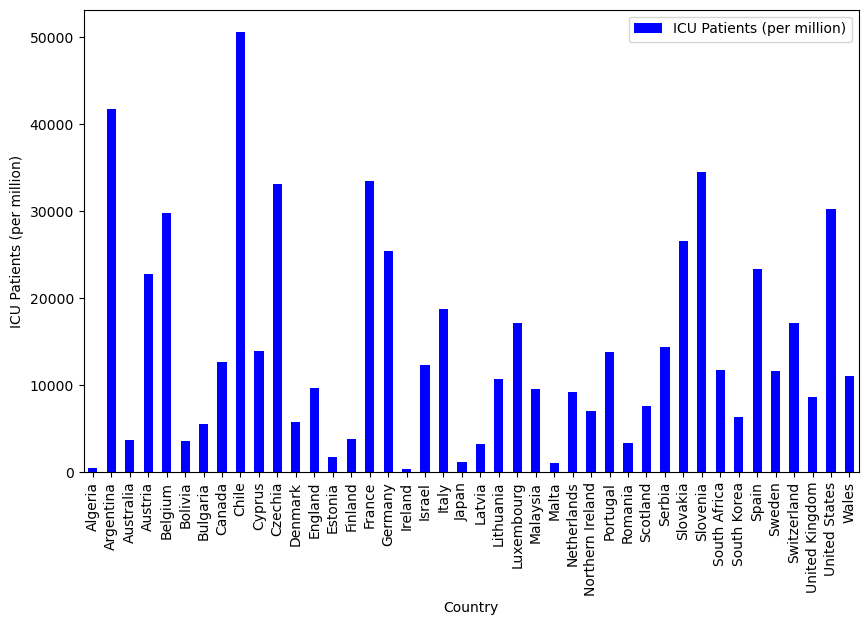

In [26]:


# icu_vs_country = icu_location[['Country', 'ICU Patients (per million)']]
# # print(icu_loc_nona)

# # x_axis_data = icu_location['Country']
# # plt.xticks(rotation = 90)

# # plt.plot(x_axis_data, icu_loc_nona)
# # plt.show()

figure1 = country_icu.plot(kind="bar", facecolor="blue", figsize=(10,6),
                                xlabel="Country",
                                ylabel="ICU Patients (per million)")

# # Configure x-tick rotation

# # Show plot
plt.show()




In [51]:
icu_vax = icu_location.groupby(['People Vaccinated (per hundred)'])
icu_vax_df = pd.DataFrame(icu_vax['ICU Patients (per million)'])
icu_vax_df.head()
# figure_icu_vax = icu_vax_df.plot(figsize=(10,6),
#                                 xlabel="People Vaccinated (per hundred)",
#                                 ylabel="ICU Patients (per million)")

# # # Configure x-tick rotation

# # # Show plot
# plt.show()

,0,1
0,0.00,3150 NaN 3151 0.735 15589 0...
1,0.01,15590 0.000 26568 42.553 26569 42...
2,0.02,26574 36.891 50001 18.099 99584 38...
3,0.03,15591 0.000 33498 NaN 43115 ...
4,0.04,33499 NaN 56905 35.707 56906 36...
